In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regression as reg
from scipy import stats
from matplotlib import pyplot as plt
import pickle
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
from graph_tool import centrality

In [34]:
metrics = pd.read_csv("metrics_sharpe_volume.csv")

In [26]:
metrics

,Unnamed: 0,Symbol,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
0,0,AADR,-0.138521,0.244183,-0.567284,1.431660e+04,0.000000,0.000000,1.000000
1,1,AAXJ,-0.113130,0.227159,-0.498020,1.246921e+06,0.001561,0.007760,0.984460
2,2,ACSI,0.556156,0.206869,2.688447,1.581096e+03,0.000000,0.000000,0.000000
3,3,ACWF,0.181302,0.202850,0.893772,2.369555e+04,0.000173,0.440411,0.921866
4,4,ACWI,0.359218,0.202702,1.772148,3.582106e+06,0.000467,0.488423,0.907496
...,...,...,...,...,...,...,...,...,...
864,864,YCS,0.642359,0.160138,4.011278,2.282875e+04,0.000262,0.912770,0.878619
865,865,YLD,0.263801,0.095465,2.763319,3.090715e+04,0.002776,0.007491,0.996104
866,866,YLDE,0.613717,0.186718,3.286863,1.883002e+03,0.000105,0.010902,0.969227
867,867,YPS,0.429393,0.231255,1.856799,7.697220e+03,0.000166,0.727466,0.893746


In [27]:
metrics.describe()

,Unnamed: 0,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
count,869.000000,869.000000,869.000000,869.000000,8.690000e+02,869.000000,869.000000,869.000000
mean,434.000000,0.206835,0.199975,1.065099,7.495953e+05,0.000219,0.376472,0.916009
std,251.002988,0.308002,0.116193,1.737991,4.391860e+06,0.000471,0.321683,0.133630
min,0.000000,-0.999503,0.002420,-3.015425,2.594122e+02,0.000000,0.000000,0.000000
25%,217.000000,-0.011611,0.150664,-0.099044,1.452518e+04,0.000023,0.027324,0.895639
50%,434.000000,0.109094,0.208153,0.937589,5.209754e+04,0.000130,0.350927,0.927472
75%,651.000000,0.435712,0.246987,2.057833,2.582419e+05,0.000206,0.669893,0.976559
max,868.000000,1.190117,1.557547,22.467695,8.726091e+07,0.006927,1.000000,1.000000


# Analise de Residuos

### Modelo A

In [36]:
result = reg.linear(data=metrics, formula='Volatility ~ coreness + np.abs(Return)')


result.micro_summary()

variable,coefficient,std error,p-value
coreness,-0.023347,0.013211,0.077805
np.abs(Return),0.354752,0.021649,0.000000


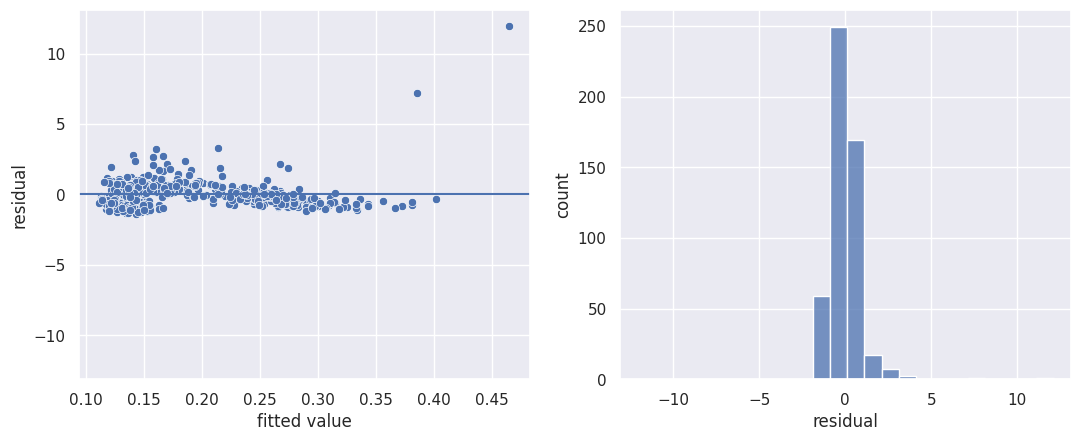

In [6]:
result.plot_residuals()

### Modelo B

In [7]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.abs(Return)')

result.micro_summary()

variable,coefficient,std error,p-value
betweenness,3.382693,7.612417,0.656970
np.abs(Return),0.355495,0.021719,0.000000


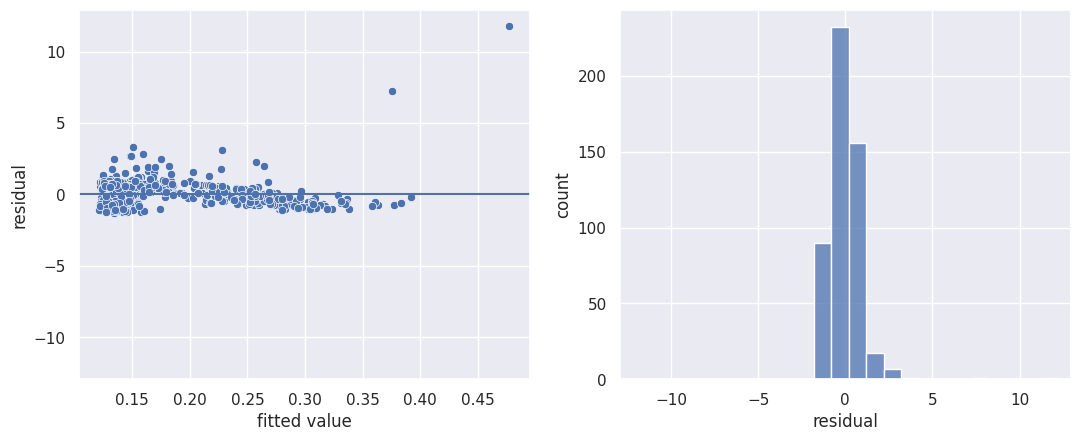

In [8]:
result.plot_residuals()

### Modelo C

In [9]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.abs(Return) + coreness')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,3.018872,7.599547,0.691357
np.abs(Return),0.355004,0.021676,0.000000
coreness,-0.023204,0.013227,0.080007


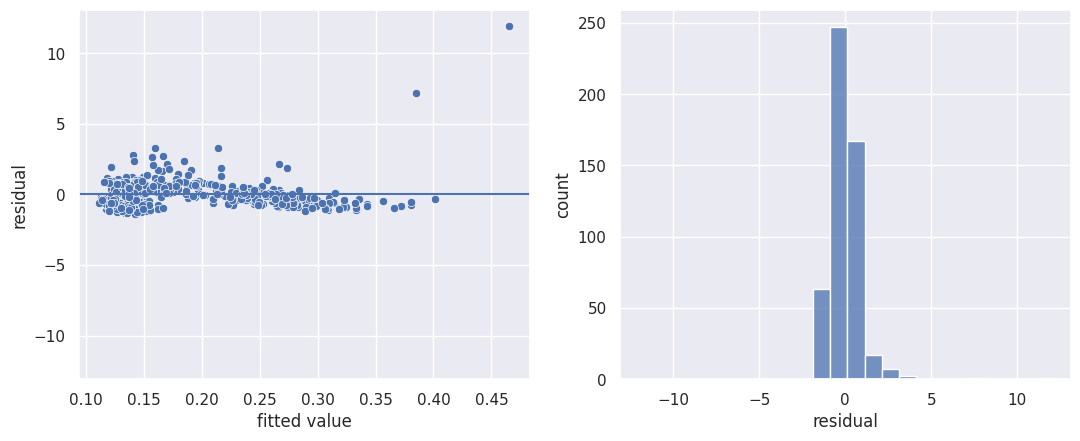

In [10]:
result.plot_residuals()

### Modelo D

In [11]:
result = reg.linear(data=metrics, formula='Return ~ clustering')
result.micro_summary()

variable,coefficient,std error,p-value
clustering,0.044496,0.075964,0.558305


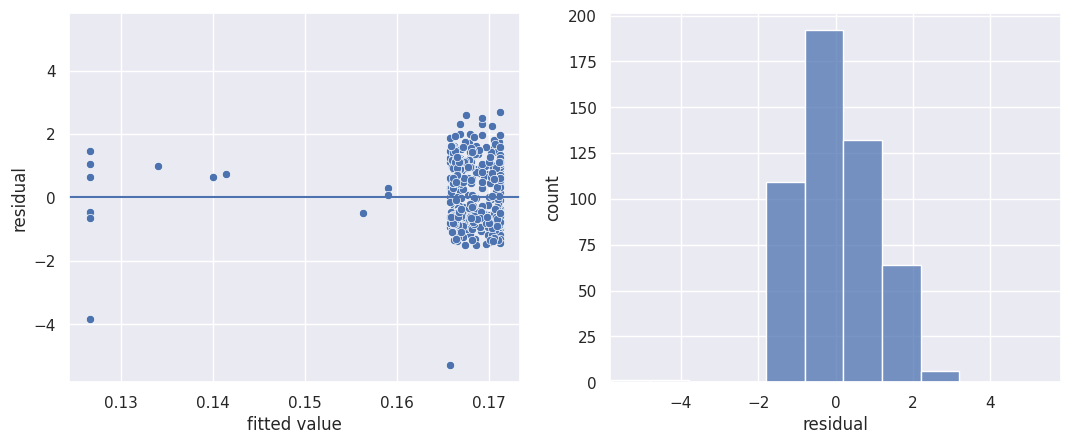

In [12]:
result.plot_residuals()

In [13]:
(result.fittedvalues > -0.170).value_counts()

True    505
dtype: int64

In [14]:
metrics[result.fittedvalues > -0.170].describe()

,Unnamed: 0,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000,505.000000,505.000000
mean,252.000000,0.167411,0.193274,0.804756,7.571557e+05,0.000219,0.413830,0.916617
std,145.925209,0.219661,0.113607,0.895812,3.397191e+06,0.000538,0.309034,0.128888
min,0.000000,-0.999503,0.013387,-0.720826,1.165830e+04,0.000000,0.000000,0.000000
25%,126.000000,0.001996,0.115867,0.019637,2.915290e+04,0.000030,0.096807,0.894674
50%,252.000000,0.083544,0.206814,0.782923,8.647935e+04,0.000141,0.418202,0.926007
75%,378.000000,0.369841,0.248153,1.580517,4.108766e+05,0.000199,0.698834,0.978594
max,504.000000,0.763572,1.557547,2.475456,5.695156e+07,0.006927,0.993160,1.000000
